# 1. Introduction

### Purpose
Purpose of the notebook is to demonstrate mathematical intuition behind SVM. The intent is to first work out the underlying maths by hand
and then replicate it via python libraries. This will help to crystalise the understanding of anyone
who is using packages to solve these problems.

### Structure
The notebook is structured in 3 different sections:
1. [Mathemactical theory](#section_2)
2. [Workout example by hand](#section_3)
3. [Use sklearn package to replicate](#section_4)

### Who is this post for:
If you want to bridge the gap between the mathematical theory and what is available via open source packages, then this notebook will help you.

If you get confused by what the various attributes of sklearn svm.SVC such as dual_coef_ and coef_, then this post will help you.

Post does not assume a lot of mathematical knowledge. In an attempt to explain from first principles, notebook has ended up a little heavy on maths. This shouldn't deter the reader as it comes with the added advantage of explaining all derivations.

Highly recommend to watch the lecture from late Prof. Patrick Winston listed below and the MIT recitation video below, before reviewing the notebbok. Reviewing the notebook later after watching those videos, will help to connect it back to what is available in sklearn to put everything into practice.
### Reference:
* Credits to section 2 - [Lecture by Patrick Winston MIT](https://www.youtube.com/watch?v=_PwhiWxHK8o)
* Credits to section 3 - [MIT Recitation on SVM](https://www.youtube.com/watch?v=ik7E7r2a1h8).
* Many thanks to https://github.com/jazzapple for reviewing the notebook and providing feedback.

### Intuition

Consider 2 clusters of points as illustrated below. It is possible to draw many lines to separate out the two set of points. Which line will best separate the 2 categories in unseen data points?
<img src="./img/0_many_lines.png" width="400">

For the best separating line, consider the margin possible for each of the lines. The one with the maximum margin is the one that separates best. In the diagram below, middle line has the maximum margin. Hence, it separates the 2 set of points better.
<img src="./img/0_many_lines_margin.png" width="400">

With this intuition, let us try to formalize how to determine the the line with the maximum margin. Extending the problem to n dimensions, question becomes how to determine the hyperplane with maximum margin.

Borrowing terminology from Prof. Patrick Winston, separating hyperplane can be considered as street. We are trying to maximise the width of the street (the green shaded area above). Street is framed by gutters lying at ends of the street. 

# 2. Mathematical Background 
<a id='section_2'></a>

#### Step 1: Derive decision rule 

We are using geometrical intuition to derive the decision boundary. 

The figure shows the hyperplane separating positive and negative points. 
$\vec{w}$ is the perpendicular vector to the separating hyperplane with maximum margin
$\vec{u}$ is the unknown vector. 

Thinking about it geometricallly in 2 dimension, to find if the unknown vector($\vec{u}$), lies on the either side of the hyperplane, we need to project the unknown vector($\vec{u}$) along the direction of w. If the projection of the unknown vector($\vec{u}$) along w, lies on the right side of the hyperplane, then it is a positive example. If the projection of the unknown vector($\vec{u}$) along w lies on the left side of the hyperplace, then it is a negative example. 

Translating the above geometric intuition to linear algebra, Find the dot product between $\vec{u}$ and $\vec{w}$. If the distance is greater than a constant c, it lies on the positive side of the hyperplane. It is less than constant c, it lies on negative side of the hyperplane.

$\vec{w}.\vec{u} >= c$

$\vec{w}.\vec{u} -c >=0$

$\vec{w}.\vec{u} -c >0$ Then positive class else negative class

<img src="./img/1_hyperplane.png" width="500">

For mathematical convenience, we will denote positive classes denoted by +1 and negative classes by -1.
Substituting -c = b,

$\vec{w}.\vec{u} +b >=0 \textrm{ then } +1 \textrm { else } -1$

Thus, we have arrived at our decision rule. 


![01_eq_decision_boundary.png](./img/01_eq_decision_boundary.png)

#### Step 2 : Derive width of the hyperplane


<img src="./img/2_width_hyperplane.png" width="500">

Using the decision rule and modifying it to introduce the constraint. Let us denote positive sample by $\vec{x_+}$ and negative sample by $\vec{x_-}$

We are denoting y for positive classes as +1 and y for negative classes as -1. 

Decision rule for positive class becomes $\vec{w}\vec{x_+} + b >=1$ 

Decision rule for negative class becomes $ \vec{w}\vec{x_-} + b <= -1$

Let us introduce a new variable $y_i = +1$ for positive samples. $y_i = -1$ for negative samples.

$y_i(\vec{w}.\vec{x_i} + b) -1 >=0$

For support vectors, $$y_i(\vec{w}\vec{x_i} + b) - 1 =0$$
Substituting for positive classes $y_+ = 1$
$$\vec{w}\vec{x_+} = 1 - b$$

Substituting for negative classes $y_- = 1$
$$-1(\vec{w}\vec{x_- +b} = 1 $$
$$\vec{w}\vec{x_-} = -1 - b$$

Let us denote 2 points $x_+$ and $x_-$ on the gutters. Straight distance d can be obtained by multiplying $x_+$ and $x_-$ with unit vector. 

w is normal to decision boundary.

$\frac{\vec{w}}{\lVert w \rVert}$ is the unit vector.

width $d = (x_+ - x_-)\frac{\vec{w}}{\lVert w \rVert}$

$d = \frac{x_+\vec{w} - x_-\vec{w}}{\lVert w \rVert}$

$d = \frac{1 - b + 1 + b}{\lVert w \rVert}$

$d = \frac{2}{\lVert w \rVert}$

![02_eq_width_hyperplane.png](./img/02_eq_width_hyperplane.png)

**Note : It is very easy to confuse margin width with $\lVert w \rVert$. Key thing to note is $\lVert w \rVert$ is  inversely proportional to margin width. When magnitude of $\vec{w}$ increases, margin width decreases.** 


### Step 3: Formalize objective function

Our objective is to maximize the width of the hyperplane identified in Step 2 -  $\frac{2}{\lVert w \rVert}$ subject to
the constraint identified in Step 1 -  $\vec{w}\vec{x} + b > 0$

Maximise $\frac{2}{\lVert w \rVert}$ such that $\vec{w}\vec{x} + b > 0$ 

Maximising $\frac{2}{\lVert w \rVert}$ is same as minimising ${\lVert w \rVert}^2$

So, the objective function becomes minimise ${\lVert w \rVert}^2$ such that $\vec{w}\vec{x} + b > 0$  

### Step 4: Optimise

A technique from math called [Lagrangian Multiplier](https://en.wikipedia.org/wiki/Lagrange_multiplier) is used to solve the above objective.

The method can be summarized as follows: in order to find the maximum or minimum of a function $f(x)$ subjected to the equality constraint $g(x)=0$, form the Lagrangian function

${L}(x,\lambda )=f(x)-\lambda g(x)$

$f(x) = {\frac{1}{2}}{\lVert}w{\rVert}^2 $

$g(x) = y_i(\vec{w}\vec{x_i}+b) -1 = 0$

Using the lagrangian multiplier $\alpha$ leads to defining the **Primal problem** 

$$ L = {\frac{1}{2}}{\lVert}w{\rVert}^2 - \sum \alpha_i{\lbrack}y_i(\vec{w}\vec{x_i}+b) -1{\rbrack}$$

To find extremum of function, calculate derivate w.r.t moving parts and set them to 0
$$ L = {\frac{1}{2}}{\lVert}w{\rVert}^2 - \sum \alpha_i y_i \vec{w}\vec{x_i} - \sum \alpha_i y_i b + \sum \alpha_i$$

$\frac{\partial L}{\partial w} = 0$

Calculating the derivatives of each of the components in the equation above:
$$\frac{\partial {\lVert}w{\rVert}^2}{\partial w} = \vec{w} $$

$$\frac{\partial {\alpha_i y_i \vec{w}\vec{x_i}}}{\partial w} = \alpha_i y_i \vec{x_i} $$

No w term, derivative w.r.t constant $\frac{\alpha_i y_i b}{\partial w} = 0 $

No w term, derivative w.r.t constant $\frac{\alpha_i}{\partial w} = 0 $ 

$$\vec{w} - \sum {\alpha_i} y_i \vec{x_i} = 0 $$
$$\vec{w} = \sum {\alpha_i} y_i \vec{x_i} $$


$\frac{\partial L}{\partial b} = 0$
$$\sum \alpha_i y_i = 0 $$



In addition to the dual problem optimisation, because the constraint is an inequalilty, all the [KKT conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) need to be satisfied.

Complementary slackness condition on the inequality constraint leads to the following equation: 
$ \alpha_i{\lbrack}y_i(\vec{w}\vec{x_i}+b) -1{\rbrack} = 0 $

Which leads to the intuition behind the non support vectors, when  $y_i(\vec{w}\vec{x_i}+b) != 1 => \alpha_i = 0 $

Step above provide 3 main equations that are critical:
![03_eq_primal_problem.png](./img/03_eq_primal_problem.png)  

![04_eq_support_vector_coefficient.png](./img/04_eq_support_vector_coefficient.png)

![05_eq_support_vector_sum.png](./img/05_eq_support_vector_sum.png)

### Intuition : 

##### Intuition on Weights
* If a point is not on a support vector, then alpha for that will be 0.
$\vec{w}$ is the linear sum of some training samples. For non support vectors $\alpha_i$ will be zero. Hence, $w_i$ will be 0 .

* Sum of alphas across all the categories will be 0. For binary classification, sum of alphas for positive class is same as the sum of alphas for the negative class


### Step 5: Dual Problem
Substituting values back into the primal problem 

$$ L = {\frac{1}{2}}{\lVert}w{\rVert}^2 - \sum \alpha_i{\lbrack}y_i(\vec{w}\vec{x_i}+b) -1{\rbrack}$$


$$ L = {\frac{1}{2}} \vec{w}. \vec{w} - \sum \alpha_i{\lbrack}y_i(\vec{w}\vec{x_i}+b) -1{\rbrack}$$

$$  = {\frac{1}{2}}\sum_i \alpha_i y_i \vec{x_i} \sum_j \alpha_j y_j \vec{x_j} - \sum_i \alpha_i y_i\vec{w}\vec{x_i} - \sum \alpha_i y_i b + \sum \alpha_i $$

Next, let us substitute the value for $\vec{w}$ from equation above from primal problem. b is a constant and can be taken out of the summation.

$$  = {\frac{1}{2}}\sum_i \alpha_i y_i \vec{x_i} \sum_j \alpha_j y_j \vec{x_j} - \sum_i \alpha_i y_i\sum_j \alpha_j y_j \vec{x_j}\vec{x_i} - b\sum \alpha_i y_i + \sum \alpha_i $$

From above $ \sum \alpha_iy_i = 0 $, so term with constant b is 0.
$\sum \alpha_i y_i\sum \alpha_j y_j \vec{x_j}\vec{x_i}$ can be rearranged as $\sum \alpha_i y_i \vec{x_i}\sum \alpha_j y_j \vec{x_j}$

$$  = {\frac{1}{2}}\sum_i \alpha_i y_i \vec{x_i} \sum_j \alpha_j y_j \vec{x_j} - \sum_i \alpha_i y_i \vec{x_i} \sum_j \alpha_j y_j \vec{x_j} - b*0 + \sum \alpha_i $$

$$ L = \sum {\alpha_i} - \frac{1}{2} \sum_i \sum_j {\alpha_i}{\alpha_j}{y_i}{y_j}{x_i}{x_j}$$

# 3. Workout Maths
<a id='section_3'></a>
In this example, we will take an example of points that are linearly separable.Inspecting the points below, separating hyperplane is from x=1 and x=3. The centre of the separating hyperplane passess through x=2. Width of the separating hyperplane is 2. We will first workout the maths
and then try to cross check our results via computation.

**Derive decision rule. How to calculate w and b in the decision rule?**

***Step 1 : Draw the decision boundary***

y=0 are denoted by blue dots. 
y=1 are denoted by orange crosses

Need to draw the street with maximum width that separates the two. 
A street with width=2 is possible between x=1 and x=3. Middle of the street passes through x=2. 

<img src="./img/03_workout_maths_sample_data.png" width="500">


***Step 2: Write the equation for the boundary $x=2$***
This can be written in the standard line equation $1x-0y-2=0$ . Rewiting it this way will help in factorising weights in step3.

***Step 3: Rewite the above equation in the form $wx + b = 0$***
 $$\begin{bmatrix} ? & ? \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} + b = 0$$
 
Extrapolating from the line equation above, we can fill in the dashes

**Equation1**
 $$\begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} - 2 = 0$$
 
Equation 1 has a degree of freedom. It is possible to multiply it by a constant and still satisfy the equation. So, we need to introduce scaling by a constant such that $\textrm {margin width}  = \frac{2}{\lVert w \rVert}$. However, that alone won't be sufficient as we need to introduce the constraint that w points to positive class. 

**Equation2**
Scale Equation1 by a constant such that $$\textrm {margin width} =\frac{2}{\lVert w \rVert}$$. 

A more easier way mathematically, is to introduce gutter constraint

 $$\textrm{for positive classes, }wx + b >=1 $$ 

 $$\textrm{for negative classes, }wx + b <=-1 $$ 

$wx+b=1$  for gutters for positive class
$wx+b=-1$ for gutters for negative class


**Equation 3**
for all support vectors, $$\vec{w}\vec{x} + b = y_i$$
$$y_i = class(i) = +1 or -1$$

To derive the value of w and b, manually, let us substitute one of the support vectors into the equation. Let us consider point D - (3,2).
$$\vec{w}\vec{x_D} + b = -1$$

Substituting for point D, and using values from equation 1, check if the equation above holds good.
$$\begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 3 \\ 2 \end{bmatrix} -2 = -1$$
$$ 3 -2 != 1 $$

So, we have to scale by constant,c
$$c*\begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 3 \\ 2 \end{bmatrix} -c*2 = -1$$
c = -1

$$ weight = \begin{bmatrix} -1 & 0 \end{bmatrix}$$
$$ b = 2 $$

From the diagram, we know that margin width = 2. 

Let us check what $\frac{2}{\lVert w \rVert}$ is : $2/1 = 2$
So, we have sense checked this with equation2.

Let us also check the direction of $\vec{w}$.  $\vec{w}$ points towards -1, 0. It points towards the positive class as shown in the diagram above.

So, far we have calculated $\vec{w}$ and b. This has formalised the maximum margin hyperplane. Next, we would like to calculate supportiveness of the values. 

**Calculating support vector values**

Step 1 : For all non-support vectors, $\alpha=0$.
 For support vectors,i.e - points on the gutters, $\alpha>0$
 
Step 2 : There are 2 equations from introducing lagrange multipier.
$$\sum{\alpha_i}y_i = 0$$
Substituting the value $y_i$ for positive and negative classes, 
$$\sum_{positive classes}{\alpha_p} = \sum_{negative classes}{\alpha_n}$$
Looking at the support vectors in scenario1, we have equation1:
$${\alpha_A} + {\alpha_B} = {\alpha_D}$$

Step 3: $$\vec{w} = \sum{\alpha_i}y_ix_i$$
Looking at the support vectors in scenario1,
$$\vec{w} = {\alpha_A}y_Ax_A + {\alpha_B}y_Bx_B + {\alpha_D}y_Dx_D  $$
Substitue the values of $\vec{w}$, x and y
$$\begin{bmatrix} -1 & 0 \end{bmatrix}= {\alpha_A}\begin{bmatrix}1\\3\end{bmatrix} +  {\alpha_B}\begin{bmatrix}1 \\1\end{bmatrix} - 
{\alpha_D}\begin{bmatrix}3\\2\end{bmatrix}$$

Deriving 2 equations from above
$$-1 = \alpha_A + \alpha_B - 3\alpha_D  \textrm{    equation_1}$$ 
$$0 = 3\alpha_A + \alpha_B - 2\alpha_D  \textrm{    equation_2}$$

Subsitute equation from step 2 ${\alpha_A} + {\alpha_B} = {\alpha_D}$, into the equation_1 above.
$$-1 = \alpha_A + \alpha_B - 3\alpha_D $$ 
$$-1 = \alpha_D - 3\alpha_D$$
$$\alpha_D = 1/2$$

Simplifying the 2 equations (substract equation_2 from equation_1):

$$1 = 2\alpha_A + \alpha_D $$ 
Substitute value for $\alpha_D = \frac{1}{2}$ 
$$\alpha_A = 1/4$$
$$\alpha_B = 1/4$$
$$\alpha_D = 1/2$$

# 4. Using Code
### sklearn SVM package
<a id='section_4'></a>

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Generate random points for positive class with x1 < 1
X1_pos = random.sample(range(-5,1), 5)
X2_pos = random.sample(range(0,5), 5)
X_pos = np.column_stack([X1_pos, X2_pos])
# Add couple of points with x1=1. These are our special support vectors
X_pos = np.vstack([X_pos, [[1,1]], [[1,3]]])

In [3]:
# Generate random points for negative class with x1 > 4
X1_neg = random.sample(range(4, 12), 6)
X2_neg = random.sample(range(0, 7), 6)
X_neg = np.column_stack([X1_neg, X2_neg])
# Add a point with x=3
X_neg = np.vstack([X_neg, [[3,2]]])

In [4]:
# collate data together
X = np.vstack([X_pos, X_neg])
y = np.concatenate((np.repeat(1,7), np.repeat(0,7)))
df = pd.concat([pd.DataFrame(data = X, columns = ['x1', 'x2']),
               pd.Series(y, name ='y')],
              axis=1)

Text(3, 2, 'D')

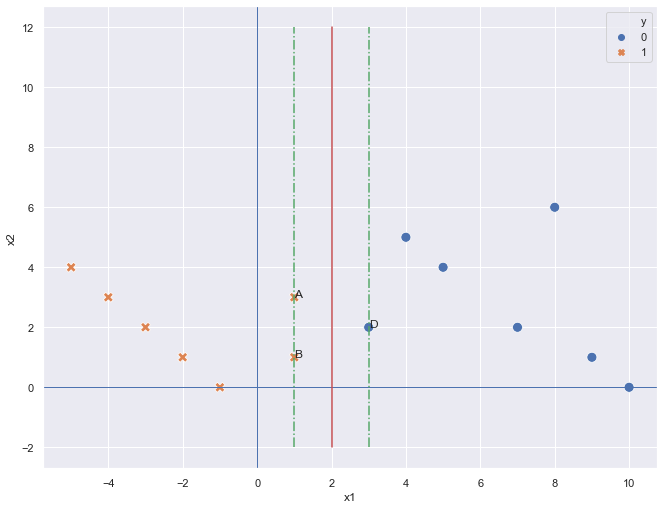

In [5]:
# Plot the data
# Use axes level function in sns to draw the random plot

# Co-ordinates for lines
margin_X = 2 * np.ones(12)
margin_Y = np.linspace(-2, 12, num=12)

gutter1_X = np.ones(12)
gutter1_Y = np.linspace(-2, 12, num=12)

gutter2_X = 3 * np.ones(12)
gutter2_Y = np.linspace(-2, 12, num=12)

# Prepare the plot
fig, ax = plt.subplots(figsize = (11, 8.5))
sns.scatterplot(x='x1', y='x2', hue='y', style='y', data=df, s=100)
ax.axhline(y=0, linewidth=1)
ax.axvline(x=0, linewidth=1)

plt.plot(margin_X, margin_Y, color='r')
plt.plot(gutter1_X, gutter1_Y, 'g-.')
plt.plot(gutter2_X, gutter2_Y, 'g-.')

plt.text(x=1, y=3, s="A")
plt.text(x=1, y=1, s="B")
plt.text(x=3, y=2, s="D")



In [6]:
df

,x1,x2,y
0,-3,2,1
1,-1,0,1
2,-4,3,1
3,-2,1,1
4,-5,4,1
5,1,1,1
6,1,3,1
7,10,0,0
8,4,5,0
9,5,4,0


In [7]:
# Fit the model
model = svm.SVC(kernel='linear')
model.fit(X,y)
model.support_vectors_


array([[3., 2.],
       [1., 1.],
       [1., 3.]])

In [8]:
model.support_

array([13,  5,  6])

In [9]:
model.n_support_

array([1, 2])

In [10]:
model.dual_coef_

array([[-0.5001472,  0.2500736,  0.2500736]])

Reconcile the above values with manually calculated $\alpha$ values above

In [11]:
model.coef_

array([[-1.0002944,  0.       ]])

Reconcile the above values with the values calculated for $\vec{w}$.

In [12]:
model.intercept_

array([2.00049067])

Reconcile the above with values calculated for b

#### Insights
1. $\vec{w}$ was calculated as $\begin{bmatrix} -1 & 0 \end{bmatrix}$
Values from python program array([[-0.99968,  0.     ]])

2. Value of the intercept derived is 1.99946. Value derived via manual calculation is 2.

3. Values of support vectors derived are : 
$$\alpha_A = 1/4$$
$$\alpha_B = 1/4$$
$$\alpha_D = 1/2$$

Values from python program, derived via dual_coef_ array([[-0.49984,  0.24992,  0.24992]]), matches, ordering by class of the support vectors probably.

## Additional Questions

Questions to ponder upon:

* 1. What happens if the support vectors move far out horizontally? What will happen to supportiveness of the points? What will happen to weights?
* 2. What happens if support vectors move vertically? What will happen to the supportiveness of points? What will happen to weights?

## Appendix

### Rendering Issues
If there are rendering issues with maths equations above, will be good to check 
nbconvert version
https://github.com/jupyter/notebook/issues/2865

In [ ]:
# import nbconvert
# print(nbconvert.__version__)

Code for images used in the diagram is available in the repo in the img subfolder